In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
# qt
%matplotlib inline

# Linear algebra

## Euclidean distance basic calculation

In [2]:
a1, a2, b1, b2 = sym.symbols('a_1, a_2, b_1, b_2,')
a = sym.Matrix([a1,a2])
b = sym.Matrix([b1,b2])
Euclidean_distance = sym.sqrt(sym.DotProduct(a-b,a-b)).doit()
Euclidean_distance

sqrt((a_1 - b_1)**2 + (a_2 - b_2)**2)

# Statistics

## Normal distribution in 3D (Bivariate case)

In [3]:
def norm3D(x, y, mean, sigma):
    ret = np.zeros([len(x), len(y)])
    for iCount, i in enumerate(x):
        for jCount, j in enumerate(y):
            X = np.array([[i], [j]])
            ret[iCount, jCount] = np.exp(-(1/2)*np.dot(np.transpose(X-mean),
                                                       np.dot(np.linalg.inv(sigma), (X-mean))))
    return ret / np.sqrt(((2*np.pi)**2)*np.linalg.det(sigma))

# Basic plotting

## Bar plot in 3D (Mainly for Parzen)

In [4]:
def barPlot3D(x,y,p,h_n):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    X, Y = np.meshgrid(x,y)
    x = X.reshape(-1)
    y = Y.reshape(-1)
    p = p.reshape(-1)
    ax.bar3d(x,y,np.zeros_like(p),h_n*np.ones_like(p),h_n*np.ones_like(p),p)
    plt.show()

## Surface plot in 3D

### Singular

In [5]:
def plotSurf3D(x,y,p):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    X, Y = np.meshgrid(x,y)
    ax.plot_surface(X,Y,p)
    ax.view_init(elev=15,azim=50)
    plt.show()

### Multiple

In [6]:
def plotMultipleSurf3D(x,y,p,colors=None):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    X, Y = np.meshgrid(x,y)
    if colors is None:
        for z in p:
            ax.plot_surface(X,Y,z,alpha=0.8)
            ax.view_init(elev=15,azim=50)
    else:
        for i, z in enumerate(p):
            ax.plot_surface(X,Y,z,alpha=0.8,color=colors[i])
            ax.view_init(elev=15,azim=50)
    plt.show()

# Bayes decision theory

## Discriminant functions

## Case I

Given a diagonal covariance matrix:
$$\Sigma=\sigma^2 I$$

The discriminant function can be calculated as:

$$g_i (x)=-\frac{1}{2\sigma^2}||x-\mu_i||^2 + ln(P(\omega_i))$$

Furthermore, if the priors ($P(\omega_i)$) are equal, it simplifies to:

$$g_i (x)=-\frac{1}{2\sigma ^2}||x-\mu_i||^2$$

A Alternative representation is:

$$g_i=\theta_i^Tx + \theta_{i0} $$

With:

$$\theta_i = \frac{1}{\sigma^2}\mu_i$$
$$\theta_{i0} = -\frac{1}{2\sigma^2}\mu_i^T\mu_i +ln(P(\omega_i))$$

In [7]:
Pi = sym.symbols('P(\omega_i)')

x1, x2 = sym.symbols('x_1, x_2')
sigma = sym.symbols('\sigma')
mu1, mu2 = sym.symbols('\mu_1, \mu_2')
x = sym.Matrix([x1, x2])
mu = sym.Matrix([mu1, mu2])

# sigma = 1.5
# mu = sym.Matrix([3,2])

g = (-1/(2*(sigma**2)))*(sym.transpose(x-mu)*(x-mu)) + sym.Matrix([sym.log(Pi)])

g = (-1/(2*(sigma**2)))*(sym.transpose(x-mu)*(x-mu))
sym.simplify(g)


Matrix([[(-(\mu_1 - x_1)**2 - (\mu_2 - x_2)**2)/(2*\sigma**2)]])

## Case II

Given a *symmetrical* $\Sigma_i = \Sigma$:
$$
\Sigma=
\left(\begin{array}{cc} 
\sigma_{1} ^2 & . & \sigma_{1,l}\\
. & . & .\\
\sigma_{1,l} & . & \sigma_{l} ^2
\end{array}\right)
$$ 

The discriminant function can be calculated as:

$$g_i=\frac{-1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu) + ln(P(\omega_i))$$

Furthermore, if the priors ($P(\omega_i)$) are equal, it simplifies to:

$$g_i=\frac{-1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu)$$

A Alternative representation is:

$$g_i=\theta_i^Tx + \theta_{i0} $$

With:

$$\theta_i = \Sigma^{-1}\mu_i$$
$$\theta_{i0} = -\frac{1}{2}\mu_i^T\Sigma^{-1}\mu_i+ln(P(\omega_i))$$

In [8]:
Pi = sym.symbols('P(\omega_i)')

x1, x2 = sym.symbols('x_1, x_2')
s11, s12, s21, s22 = sym.symbols('\sigma_11, \sigma_12, \sigma_21, \sigma_22')
mu1, mu2 = sym.symbols('\mu_1, \mu_2')
x = sym.Matrix([x1, x2])
sigma = sym.Matrix([[s11,s12],[s21,s22]])
mu = sym.Matrix([mu1, mu2])

# sigma = sym.Matrix([[1,2],[3,4]])
# mu = sym.Matrix([3,2])

g = (-1/(2))*(sym.transpose(x-mu)* sigma**-1 *(x-mu)) + sym.Matrix([sym.log(Pi)])

g = (-1/(2))*(sym.transpose(x-mu)* sigma**-1 *(x-mu))
sym.simplify(g)


Matrix([[0.5*((\mu_1 - x_1)*(\sigma_21*(\mu_2 - x_2) - \sigma_22*(\mu_1 - x_1)) - (\mu_2 - x_2)*(\sigma_11*(\mu_2 - x_2) - \sigma_12*(\mu_1 - x_1)))/(\sigma_11*\sigma_22 - \sigma_12*\sigma_21)]])

## Case III

Given a *arbitrary* $\Sigma_i$ (Class dependent),

The discriminant function can be calculated as:

$$g_i=\frac{-1}{2}(x-\mu)^T \Sigma_i ^{-1} (x-\mu) - \frac{1}{2}ln(|\Sigma_i|) + ln(P(\omega_i))$$

Furthermore, if the priors ($P(\omega_i)$) are equal, it simplifies to:

$$g_i=\frac{-1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu) - \frac{1}{2}ln(|\Sigma_i|)$$

A Alternative representation is:

$$g_i= x^T\Theta_ix + \theta_i^Tx + \theta_{i0} $$

With:

$$\Theta_i = -\frac{1}{2}\Sigma_i^{-1}$$
$$\theta_i = \Sigma^{-1}\mu_i$$
$$\theta_{i0} = -\frac{1}{2}\mu_i^T\Sigma^{-1}\mu_i- \frac{1}{2}ln(|\Sigma_i|) +ln(P(\omega_i))$$

In [9]:
Pi = sym.symbols('P(\omega_i)')

x1, x2 = sym.symbols('x_1, x_2')
s11, s12, s21, s22 = sym.symbols('\sigma_11, \sigma_12, \sigma_21, \sigma_22')
mu1, mu2 = sym.symbols('\mu_1, \mu_2')
x = sym.Matrix([x1, x2])
sigma = sym.Matrix([[s11,s12],[s21,s22]])
mu = sym.Matrix([mu1, mu2])

# sigma = sym.Matrix([[1,2],[3,4]])
# mu = sym.Matrix([3,2])

g = (-1/(2))*(sym.transpose(x-mu)* sigma**-1 *(x-mu)) - sym.Matrix([(1/2)*sym.log(sym.det(sigma))]) + sym.Matrix([sym.log(Pi)])

g = (-1/(2))*(sym.transpose(x-mu)* sigma**-1 *(x-mu)) - sym.Matrix([(1/2)*sym.log(sym.det(sigma))])
sym.simplify(g)



Matrix([[0.5*((\mu_1 - x_1)*(\sigma_21*(\mu_2 - x_2) - \sigma_22*(\mu_1 - x_1)) - (\mu_2 - x_2)*(\sigma_11*(\mu_2 - x_2) - \sigma_12*(\mu_1 - x_1)) - (\sigma_11*\sigma_22 - \sigma_12*\sigma_21)*log(\sigma_11*\sigma_22 - \sigma_12*\sigma_21))/(\sigma_11*\sigma_22 - \sigma_12*\sigma_21)]])

## Testing with exam 2021 version A, task 1 g-i

**Case II**

In [10]:
sigma1 = sym.Matrix([[0.5,0],[0,0.5]])
mu1 = sym.Matrix([-1.5,-1.5])
P1 = 0.2

sigma2 = sym.Matrix([[1,0],[0,0.5]])
mu2 = sym.Matrix([1.5,1.5])
P2 = 0.6

sigma3 = sym.Matrix([[0.5,0],[0,0.5]])
mu3 = sym.Matrix([0,0])
P3 = 0.2

g1 = (-1/(2))*(sym.transpose(x-mu1)* sigma1**-1 *(x-mu1)) + sym.Matrix([sym.log(P1)])
g2 = (-1/(2))*(sym.transpose(x-mu2)* sigma2**-1 *(x-mu2)) + sym.Matrix([sym.log(P2)])
g3 = (-1/(2))*(sym.transpose(x-mu3)* sigma3**-1 *(x-mu3)) + sym.Matrix([sym.log(P3)])
# sym.expand(g1) # Verified, note: Constant wrong, probably due to rounding errors? -5.42 =|= -6.109...
# sym.expand(g2) # Verified, note: Constant wrong, probably due to rounding errors? -3.54 =|= -3.886...
# sym.expand(g3) # Verified, note: Constant wrong, probably due to rounding errors? -0.916 =|= -1.609...

# Parameter estimation

Assumptions:

1. The samples in $\chi_i$ have been independently drawn from $p(x|\omega_i)$.
2. $p(x|\omega_i)$ has a known type of distribution with form defined by parameters in $\Theta_i$.

From this the distribution is denoted as:

$$p(x|\omega_i,\Theta_i)$$

For gaussian distributions $\Theta_i$ then consists of elements from $\mu_i$ and $\Sigma_i$.

The methodology is to estimate $\Theta_i$ from provided data.

## Likelihood

Likelihood of a dataset explained by a given $\Theta_i$:

$$p(\chi_i,\Theta_i)=\prod_{k=1}^N p(x_n,\Theta_i)$$

Estimate the $\Theta$ to obtain maximum likelihood, which is done by differentiating and setting equal to 0, solving for $\Theta$.

This is much easier when using log-likelihoods.

For a monovariable gaussian distribution:

In [11]:
dataset = np.array([0,0,1,1,2,2])
N       = len(dataset)
mu      = 1/N * sum(dataset)
sigma   = 1/N * sum((dataset-mu)**2)
print(f'\mu is: {mu}\n\sigma is: {sigma}')

\mu is: 1.0
\sigma is: 0.6666666666666666


For a multivariate gaussian distribution:

In [12]:
dataset = np.array([[0,0,1,1,2,2],[0,0,2,2,4,4],[0,0,.2,.2,.4,.4]])
numClasses = len(dataset)
dataLen = len(dataset[0])
mu = np.zeros([numClasses,1])
sigma = np.zeros([numClasses,1])
for i, data in enumerate(dataset):
    mu[i]      = 1/N * np.sum(data)
    sigma[i]   = 1/N * np.dot(data-mu[i],(data-mu[i]))
    print(f'\mu_{i} is: {mu[i][0]}\n\sigma_{i}^2 is: {sigma[i][0]}')

\mu_0 is: 1.0
\sigma_0^2 is: 0.6666666666666666
\mu_1 is: 2.0
\sigma_1^2 is: 2.6666666666666665
\mu_2 is: 0.2
\sigma_2^2 is: 0.026666666666666672


# Non-parametric estimation

In contrast to parameter estimation, non-parametric estimation doesn't assume the form distribution to be known.

## Regional density

Regional density is as the name suggests a method that calculate how densely packed a amount of datapoints are within a region, in comparison to the total number of datapoints.

This then can be specified further into two approaches;
1. Choosing a volume before calculating, which is the Parzen window technique.
2. Choosing a number of elements per point before calculating, which is the K-nearest technique.

The probability from these are calculated as:

$$p(x) = \frac{\frac{k_n}{N}}{V_n}$$

Where $k_n$ is the number of elements, and $V_n$ is the volume.

### Parzen window technique

Typically the volume is set to:

$$V_n=\frac{1}{\sqrt N}$$

In [13]:
dataset = np.array([[[1,1],[2,2],[2,2],[1,2],[2,2]],
                    [[2,3],[3,4],[2,2],[1,2],[2,2]],
                    [[1,0],[3,2],[2,2],[1,2],[2,2]],
                    [[1,3],[2,4],[2,2],[1,2],[2,2]]])
numClasses = len(dataset)
numDims = np.shape(dataset)[2]
x = y = np.linspace(-2,5,50)
p = np.zeros([numClasses,len(x),len(y)])
h_n = np.zeros([numClasses,1])
for i, data in enumerate(dataset):
    N = len(data)
    h_n[i] = 1/np.sqrt(N)
    for p1, x1 in enumerate(x):
        for p2, x2 in enumerate(y):
            count = 0
            for d in data:
                if np.sqrt(np.dot((np.array([x1,x2])-d),(np.array([x1,x2])-d)))/h_n[i] <= 1/2:
                    count += 1
            p[i,p1,p2] = (count/N)/h_n[i]

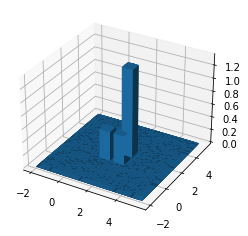

In [14]:
barPlot3D(x,y,p[0],h_n[0])

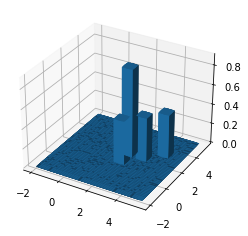

In [15]:
barPlot3D(x,y,p[1],h_n[1])

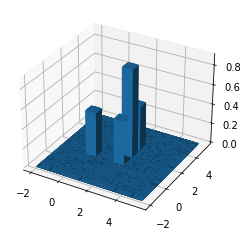

In [16]:
barPlot3D(x,y,p[2],h_n[2])

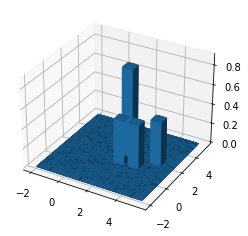

In [17]:
barPlot3D(x,y,p[3],h_n[3])

This also introduces sharp edges though, and is therefore not a very good PDF. Instead a good approximation is a gaussian distribution with the parameters:

$$\mu_i=x_i$$

$$\sigma_i=h_n^2$$

In [18]:
dataset = np.array([[[1,1],[2,2],[2,2],[1,2],[2,2]],
                    [[2,3],[3,4],[2,2],[1,2],[2,2]],
                    [[1,0],[3,2],[2,2],[1,2],[2,2]],
                    [[1,3],[2,4],[2,2],[1,2],[2,2]]])
numClasses = len(dataset)
numDims = np.shape(dataset)[2]
x = y = np.linspace(-2,5,20)
p = np.zeros([numClasses,len(x),len(y)])
h_n = np.zeros([numClasses,1])
for i, data in enumerate(dataset):
    N = len(data)
    h_n[i] = 1/np.sqrt(N)
    for d in data:
        d = d.reshape([2,1])
        p[i,:,:] += norm3D(x,y,d,(h_n[i]**2)*np.eye(2))

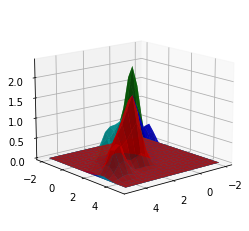

In [19]:
colors = ['g','r','b','c']
plotMultipleSurf3D(x,y,p,colors=colors)

### K-nearest technique

Typically the number of elements per point is set to:

$$k_n=\sqrt N$$

For the same reasons as for the Parzen technique, this technique is also better approximated with gaussian distributions with parameters:

$$\mu_i=x_i$$

$$\sigma_i=h_n^2$$

Time required in minutes on my system given $x$ steps: 
$$x=50\rightarrow18$$
$$x=25\rightarrow4$$
$$x=10\rightarrow0$$

Time required exponentially increase, for own sanity, never run more than 50

In [20]:
dataset = np.array([[[1,1],[2,2],[2,2],[1,2],[2,2]],
                    [[2,3],[3,4],[2,2],[1,2],[2,2]],
                    [[1,0],[3,2],[2,2],[1,2],[2,2]],
                    [[1,3],[2,4],[2,2],[1,2],[2,2]]])
numClasses = len(dataset)
numDims = np.shape(dataset)[2]
steps = 20
x = y = np.linspace(-2,5,steps)
p = np.zeros([numClasses,len(x),len(y)])
k_n = 3
for i, data in enumerate(dataset):
    for x1 in x:
        for x2 in y:
            X = np.array([x1,x2]).reshape([2,1])
            length = np.zeros(len(data))
            for pNum, point in enumerate(data):
                a = np.squeeze(np.asarray(point.reshape([2,1])))
                b = np.squeeze(np.asarray(X))
                length[pNum] = np.sqrt(np.abs(np.dot(a-b,a-b))) # Euclidean distance
            length = np.sort(length)
            h_n = length[k_n-1] # -1 for K-nearest -> indexNum
            if h_n < steps/100:
                h_n = steps/100
            p[i,:,:] += norm3D(x,y,X,(np.pi*h_n**2)*np.eye(2))

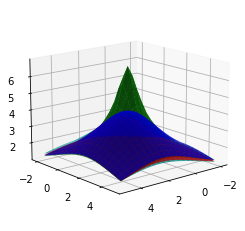

In [21]:
colors = ['g','r','b','c']
plotMultipleSurf3D(x,y,p,colors=colors)

# Linear discriminant functions

## Linear regression

Important note:

Nonlinear problems can often be turned into linear ones.

Example:

$$y=f_\theta(x)=\theta_0+\theta_1x+\theta_2x^2$$

Can become:

$$y=f_\theta(x)=\theta_0+\theta_1\phi_1(x)+\theta_2\phi_2(x)$$

Which is linear with respect to the components $\phi(x)$:

$$x\rightarrow\phi(x)=
\left[\begin{array}{cc} 
x_1\\
x_2
\end{array}\right]$$

Shorthand version of the above:

$$y=\theta^Tx+\zeta=[\theta^T,\theta_0]
\left[\begin{array}{cc} 
x\\
1
\end{array}\right]+\zeta$$

Different cost methods can be used to fit line for least cost, but in this course only LS is considered.

### Least squared (LS)

$$L (y,f_\theta (x))^2=(y-f_\theta(x))^2$$

#### Sidenote 

The frobenius norm (numpy.linalg.norm(ord=None/'fro')):

$$||A||_F=[\sum_{i,j} abs(a_{i,j})^2]^{1/2}$$

#### $\hat\theta=$ argmin $J(\theta)$

The cost function for LS is:

$$J(\theta)=\sum_{n=1}^N(y_n-\theta^Tx_n)^2$$

This is found by finding the derivative with respect to the weights:

$$\frac{\partial J}{\partial \theta}$$

$$(\sum_{n=1}^Nx_nx_n^T)\hat\theta=\sum_{n=1}^Nx_ny_n$$

$$\hat\theta=(X^TX)^{-1}X^Ty$$

Where X is a matrix:

$$ X = 
\left[\begin{array}{cc} 
x_1^T\\
x_2^T\\
.\\
x_n^T
\end{array}\right]=
\left[\begin{array}{cc} 
x_{11} & x_{12} & . & x_{1l} & 1\\
x_{21} & x_{22} & . & x_{2l} & 1\\
. & . & . & . & .\\
x_{n1} & x_{n2} & . & x_{nl} & 1
\end{array}\right]
$$

#### Least means squared (LMS) procedure

##### Gradient descent


For large matrix dimension cases, it can be computationally heavy to solve for parameters.

An alternative then is gradient descent.It works by moving towards the minima using gradients.

Given a update coefficient $\mu$ (That may vary):

Start with a estimate $\theta^{(1)}$:
$$\theta^{(i+1)}=\theta^{(i)}+\mu_i \Delta\theta^{(1)}$$
$$\theta^{(i+1)}=\theta^{(i)}-\mu_i  \nabla J(\theta^{(1)})$$

From LMS:

$$J(\theta)=\sum_{n=1}^N(y_n-\theta^Tx_n)^2$$
$$\nabla J(\theta)=-2X^T(y-X\theta)$$

Simply dropping the $-2$ since it varies with the chosen $\mu$ everything becomes:

$$\theta^{(i+1)}=\theta^{(i)}+\mu_i  X^T(y-X\theta)$$

Which becomes the update rule for this procedure for each datapoint $n$:

$$\theta^{(i+1)}=\theta^{(i)}+\mu_i  (y_n-\theta_n x_n)x_n$$

C:\Users\Andreas\AppData\Local\Temp\ipykernel_21472\2127259258.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x1 = np.array([datapoint[:-1],1])
C:\Users\Andreas\AppData\Local\Temp\ipykernel_21472\2127259258.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x1 = np.array([datapoint[:-1],1])
C:\Users\Andreas\AppData\Local\Temp\ipykernel_21472\2127259258.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If y

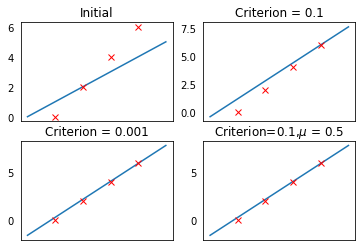

In [22]:
dataset = np.array([[0,0],[1,2],[2,4],[3,6]])
N = len(dataset)
criterion = 0.1
mu = 0.1
ø_0 = 1
ø = np.ones_like(dataset[0][:-1])
Ø = np.append(ø,ø_0)

# Plot before
x = np.linspace(-1,4,50)
plt.figure()
plt.subplot(2,2,1)
plt.plot(x,Ø[:-1]*x+Ø[-1])
plt.plot(dataset[:,0],dataset[:,1],'rx')
plt.tick_params(left = False, right = False ,
                labelbottom = False, bottom = False)
plt.title('Initial')

allPassed = False
while not allPassed:
    allPassed = True
    for i, datapoint in enumerate(dataset):
        x1 = np.array([datapoint[:-1],1])
        x2 = datapoint[-1]
        k = i % N
        if np.dot(mu*((x2 - np.dot(Ø,x1))*x1),mu*((x2 - np.dot(Ø,x1))*x1)) > criterion:
            Ø = Ø + mu*((x2 - np.dot(Ø,x1))*x1)
            allPassed = False

# Plot after
plt.subplot(2,2,2)
plt.plot(x,Ø[:-1]*x+Ø[-1])
plt.plot(dataset[:,0],dataset[:,1],'rx')
plt.tick_params(left = False, right = False ,
                labelbottom = False, bottom = False)
plt.title('Criterion = 0.1')

criterion = 0.001

allPassed = False
while not allPassed:
    allPassed = True
    for i, datapoint in enumerate(dataset):
        x1 = np.array([datapoint[:-1],1])
        x2 = datapoint[-1]
        k = i % N
        if np.dot(mu*((x2 - np.dot(Ø,x1))*x1),mu*((x2 - np.dot(Ø,x1))*x1)) > criterion:
            Ø = Ø + mu*((x2 - np.dot(Ø,x1))*x1)
            allPassed = False

# Plot after 2
x = np.linspace(-1,4,50)
plt.subplot(2,2,3)
plt.plot(x,Ø[:-1]*x+Ø[-1])
plt.plot(dataset[:,0],dataset[:,1],'rx')
plt.tick_params(left = False, right = False ,
                labelbottom = False, bottom = False)
plt.title('Criterion = 0.001')

criterion = 0.1
mu = 0.5

allPassed = False
while not allPassed:
    allPassed = True
    for i, datapoint in enumerate(dataset):
        x1 = np.array([datapoint[:-1],1])
        x2 = datapoint[-1]
        k = i % N
        if np.dot(mu*((x2 - np.dot(Ø,x1))*x1),mu*((x2 - np.dot(Ø,x1))*x1)) > criterion:
            Ø = Ø + mu*((x2 - np.dot(Ø,x1))*x1)
            allPassed = False

# Plot after 3
x = np.linspace(-1,4,50)
ax4 = plt.subplot(2,2,4)
plt.plot(x,Ø[:-1]*x+Ø[-1])
plt.plot(dataset[:,0],dataset[:,1],'rx')
plt.tick_params(left = False, right = False ,
                labelbottom = False, bottom = False)
plt.title('Criterion=0.1,$\mu$ = 0.5')
plt.show()

# Neural networks

Neural networks are a network of nodes, where all previous layer nodes will be multiplied by a weight, summed and passed to a activasion function. Based on the activation function and the sum, the node then repeats the process by sending it's value to all nodes in the next layer etc. 

The inputs can be considered the first layer or zeroth layer, and the last layer can then be the output layer. 

One node from past nodes:

$$z_{\text{node}}^{\text{layer}}$$
$$\theta_{\text{to,from}}^{\text{layer}}$$
$$\text{Activation function}=\phi(\cdot)$$
$$z_{i}^{j}=\phi\left(\sum_{n=0}^{N}z_{n}^{j-1}\theta_{i,n}^{j}\right)$$

## Cost function

The cost function for all weights $\theta$ in the network is:
$$\text{Actual}=y$$
$$\text{Result}=\phi$$
$$J(\theta)=\frac{1}{2}\sum_{k=1}^M(y_k-\phi_k)^2$$

## Backpropagation

Backpropagation is based on gradient descent, thereby ensuring that a imposed change $\Delta\theta$ will be in the direction that reduces the error.

It uses a hyperparameter that controls/is the learning rate.
$$\text{Hyper parameter}=\mu$$

Overall the change is:
$$\Delta\theta=\mu\frac{\partial J}{\partial\theta}$$

In component form the change is:
$$\Delta\theta_{pq}^r=-\mu\frac{\partial J}{\partial\theta_{pq}^r}$$

### Algorithms

#### Stochastic

Pseudocode:

&emsp; do 

&emsp; &emsp; $x\leftarrow$ randomly chosen values

&emsp; &emsp; forward calculations

&emsp; &emsp; backpropagation and update $\theta$

&emsp; while not $J(\theta)<$ criterion

&emsp; return $\theta$

#### Batch

Pseudocode:

&emsp; do 

&emsp; &emsp; do $m = m + 1$

&emsp; &emsp; &emsp; $x^m\leftarrow$ select pattern #m

&emsp; &emsp; &emsp; forward calculations

&emsp; &emsp; &emsp; backpropagation

&emsp; &emsp; while $m<$ number of samples

&emsp; &emsp; update $\theta$

&emsp; while not $J(\theta)<$ criterion

&emsp; return $\theta$

#### Online

Pseudocode:

&emsp; do 

&emsp; &emsp; $x^m\leftarrow$ next pattern

&emsp; &emsp; forward calculations

&emsp; &emsp; backpropagation and update $\theta$

&emsp; while there are more patterns available

&emsp; return $\theta$

### Practical use

Methodology:

Update weigths with training data.

Choose best network based on test data performance.

Report performance on an independent validation set.

#### Issues

##### Convergence rate

The convergence rate can be sped up in several ways.

Gradient descent with momentum implements past updates into the new update with a momentum term.
$$\partial\Delta\theta_{i,j}^r(\text{old})$$

Iteration dependent step size changes the step size depending on whether the cost function increased or decreased the previous iteration.

##### Preprocessing the input features

The advised methodology is to scale the input features to have a standard normal distribution:
$$N(0,1)$$
$$x_i'=\frac{x_i-\hat\mu_i}{\hat\sigma_i}$$

It is also advisable to have incorrelated features, which can be achieved through PCA.

##### Activation functions

There are many to choose from, but there are some requirements;
1. Continuous.
2. Differentiable.
3. Saturates/Bounded.
4. Symmetric (Advisable).

If we know distributions are gaussian, gaussian activation functions might be useful.

The target values should be slightly smaller than the bounds of the activation function.

Typically the targets are $\pm1$ and $1/0$

##### Why more layers?

Historically more than 2 layers was avoided, but it turns out that one achieves more compact representation with more layers.

This means there will be less parameters required in training the network, which improves generalisation perforamnce.

##### Choosing correct cost function

#### Pruning

# Clustering

The primary components in clustering is the quantification of similarity within a cluster, and the quantification of quality of cluster partitionings.

Therefore clustering is a two-task problem:

1. Quantify similarity.
2. Create criterion function.

## Similarity

Similarity can be measured in terms of distance, but there are many ways to calculate distances.

1. Minkowski distance $\rightarrow$ https://en.wikipedia.org/wiki/Minkowski_distance.
2. Manhattan distance $\rightarrow$ https://en.wikipedia.org/wiki/Taxicab_geometry.

If some dimensions are considered more important than others, scaling might be used.

Another similarity measure is the normalized inner product:

$$s(x^Tx)=\frac{x^Tx'}{|x|\cdot|x'|}$$

In contrast to the distance metrics, this measure gives high values for more similarity.

## Criterion function for considering quality of partitionings

### Sum of squared errors criterion

$$N=\text{Number of samples in } \chi_i, i=0,1...M$$
$$m_i=\frac{1}{N}\sum_{x\in \chi_i}x$$
$$J=\sum_{i=1}^M\sum_{x\in \chi_i}||x-m_i||^2$$

## Finding optimal partitioning

### Iterative approach

Start with a initial partitioning. 

Repeat until convergence:

1. Find the criterion function $J$. 
2. Consider changing a sample to another cluster.
3. Compare the criterion function of the considered partitioning to the current.
4. If the criterion function is "improved", perform the change considered.

The criterion function in this case will be a sum of multiple classes being correctly and incorrectly classified. The cost will be the number of missclassifications within each class summed toghether. Therefore a/the way of calculating the cost comparison is to simply compare the two classes's seperate change in cost functions $\Delta J$. Depending on the sign of the cost sum, the change is a improvement or not.

$$\Delta J_{current} + \Delta J_{\text{considered}}<0\rightarrow\text{perform change}$$

To reduce computation, only the absolutely required parts need to be calculated. They are the increase and decrease in the two cost functions compared. They have the same form and opposite sign.

$$\text{Current class is class }i$$
$$\text{Considered class is class }j$$
$$\text{Sample }m$$
$$J_i'=J_i-||\frac{N_i}{N_i+1}(x-m_i)||^2\rightarrow\Delta J_i=-||\frac{N_i}{N_i+1}(x-m_i)||^2$$
$$J_j'=J_j+||\frac{N_j}{N_j+1}(x-m_j)||^2\rightarrow\Delta J_j=||\frac{N_j}{N_j+1}(x-m_j)||^2$$

In the multiclass scenario, this is done to all classes, to see which has the best change in cost. For this, it is only neccessary to compare the increase in cost among the classed considered, since the cost decrease of the current will be constant among all cost sums. The move that meets the requirement above, and is the smallest increase among all considered classes's costs is performed. 

### Parametric approach

#### Maximum likelihood

Given:

$$\text{Dataset}=\chi=
\left[\begin{array}{cc} 
x_1 \\ 
x_2 \\ 
... \\
 x_N
\end{array}\right]$$
The likelihood of observed examples:
$$p(\chi,\theta)=\prod_{k=1}^Np(x_k,\theta)$$

We try to find the most likely $\theta$.

Finding it is easier through the log-likelihood:

$$=ln\left(p\left(\chi|\theta\right)\right)$$

$$=\sum_{k=1}^N\left(p\left(x_k|\theta\right)\right)$$

Differentiating, setting to zero and solving for $\theta$:

$$\sum_{k=1}^NP\left(\omega_i|x_k,\theta\right)\nabla_{\theta_i}lnp\left(x_k|\omega_i,\theta_i\right)$$

##### Application | case 1

Unknown mean vectors $\theta=\mu$.

$$\hat\mu_i=\frac{\sum_{k=1}^NP(\omega_i|x_k,\hat\mu)x_k}{\sum_{k=1}^NP(\omega_i|x_k,\hat\mu)}$$

Which is a weighted average, where the weight is the likelihood that $x_k$ belongs to the $i\text{th}$ class.

##### Application | case 2

All parameters are unknown, meaning $\mu_i,\Sigma_i$ and $P(\omega_i)$ are unknown.

Formulas to use iteratively:

$$\hat P\left(\omega_i\right)=\frac{1}{N}\sum_{k=1}^NP\left(\omega_i|x_k,\hat\theta\right)$$

$$\hat\mu_i=\frac{\sum_{k=1}^N\hat P(\omega_i|x_k,\hat\mu)x_k}{\sum_{k=1}^N\hat P(\omega_i|x_k,\hat\mu)}$$

$$\hat\Sigma_i=\frac{\sum_{k=1}^N\hat P\left(\omega_i|x_k,\hat\theta\right)(x_k-\hat\mu_i)(x_k-\hat\mu)^T}{\sum_{k=1}^N\hat P\left(\omega_i|x_k,\hat\theta\right)}$$

# Evaluation of classifiers

## Confusion matrix

Evaluation of classifiers can come from the confusion matrix.

The confusion matrix:
$$M = \text{total number of classes}$$
$$i = \text{true class}$$
$$j = \text{predicted class}$$
$$A=\left[
\begin{array}{cc}
    A_{1,1} & . & A_{1,j} & . & A_{1,M} \\
    .  & . & . & . & .\\
    A_{i,1}  & . & A_{i,j} & . & A_{i,M}\\
    .  & . & . & . & .\\
    A_{M,1} & . & A_{M,j} & . & A_{M,M}
\end{array}
\right]$$

The categories are;
1. Recall ($R_i$), how many within a class that is correctly classified.
2. Precision ($P_i$), how many classifications of a class that is correct.
3. Overall accuracy ($A_{cc}$).

These are more mathematically speaking defined as;
1. $$R_i=\frac{A\left(i,i\right)}{\sum_{j=1}^MA\left(i,j\right)}\rightarrow\text{sum over column}=\frac{A\left(i,i\right)}{N_i}$$
2. $$P_i=\frac{A\left(i,i\right)}{\sum_{j=1}^MA\left(j,i\right)}\rightarrow\text{sum over row}$$
3. $$A_{cc}=\frac{\sum_{i=1}^MA\left(i,i\right)}{\sum A}$$

Since the row is the true class, and the column is the prediction, summing over the columns means summing all of a true class, and vice versa for summing over the rows.

$$\text{Sum over columns of row i} = \text{True total number of class i}$$
$$\text{Sum over rows of column j} = \text{Predicted total number of class j}$$

## Bias and variance

Bias is the difference between the expected and the true value.

Variance measures how much the estimates varies with data.

## Resampling

### Jackknife method | Leave-one-out method

Take one sample out of the dataset, and calculate the parameter estimates based on the remaining dataset. 

$$\text{Leave-one-out estimate}=\hat\theta_{i}$$

Repeat for all datapoints and find the mean of those:

$$\hat\theta_{(\cdot)}=\frac{1}{N}\sum_{i=1}^N\hat\theta_{(i)}$$

And the variance:

$$Var\left[\hat\theta\right]=\frac{N-1}{N}\sum_{i=1}^N\left(\hat\theta_{(i)}-\hat\theta_{\left(\cdot\right)}\right)^2$$

Then the bias is:

$$\text{Bias}_{\text{Jackknife}}=\left(N-1\right)\left(\hat\theta_{(\cdot)}-\hat\theta\right)$$

## Cross validation

Using a training and test set, estimating statistics (confusion matrix) on each iteration.

# Feature extraction

## Dimensionality

Two aspects to consider:

1. Classification accuracy
2. Computational complexity

In theory more independent features reduces error, but in practice it flattens out and only adds computational complexity instead.

In choosing feature vectors, there are several approaches:

1. Bottom up approach, evaluating the feature vectors sequentially and choosing the best ones.
2. Top down approach, evaluating all feature vectors and sequentially removing the ones that gives the best performance when removed.
3. Backward forward, combination of the two above.
4. Correlation based

### Dimensionality reduction

#### Principal component analysis (PCA)

PCA transforms the feature space so we use principal axis as coordinate axis. This is somewhat like using a different pose in robotics / robot modeling.

This transform decorrelates the features.

Combine the features by including features, using the largest eigenvalues first, because they are the most expressive features.

This method is not optimised for discrimination, but still often works well.

#### Fisher discriminant

Transform data to lower the intraclass standard deviation, while maximizing the means.